# Old benchmarking results for comparison

In [1]:
from glob import glob
import os
import matplotlib.pyplot as plt
from benchmark import benchmark

# sshfs jpaggi@login.sherlock.stanford.edu:/oak/stanford/groups/rondror/archive/projects/combind/jbelk/method/data/ \
#       ~/Downloads/combind_data_old

root = '/Users/jpaggi/Downloads/combind_data_old'

%matplotlib inline

In [2]:
def read_chembl_file(fname):
    with open(fname) as fp:
        combind = float(fp.readline().strip().split(',')[-1])
        glide = float(fp.readline().strip().split(',')[-1])
    return combind, glide

def read_pdb_file(fname):
    combind, glide = [], []
    with open(fname) as fp:
        for line in fp:
            if line[:3] == 'max': continue
            tok = line.strip().split(',')
            combind += [float(tok[2].split('=')[1])]
            glide += [float(tok[3].split('=')[1])]
    return combind, glide

def benchmark_chembl(scores, params):
    data = {}
    for protein in [protein for protein in os.listdir(root) if protein[0] != '.' and 'old' not in protein]:
        for fname in glob('{}/{}/scores/{}/{}/*.sc'.format(root, protein, scores, params)):
            _combind, _glide = read_chembl_file(fname)
            if protein not in data: data[protein] = {}
            data[protein][fname] = (_combind, _glide, 0)
    benchmark(data)
    
def benchmark_pdb(scores):
    data = {}
    for protein in [protein for protein in os.listdir(root) if protein[0] != '.' and 'old' not in protein]:
        for fname in glob('{}/{}/scores/{}/*.sc'.format(root, protein, scores)):
            _combind, _glide = read_pdb_file(fname)
            for i, (c, g) in enumerate(zip(_combind, _glide)):
                if protein not in data: data[protein] = {}
                data[protein][i] = (c, g, 0)
    benchmark(data)

538 valid ligands
Ttest_relResult(statistic=5.3786705817740232, pvalue=1.121743953383089e-07)
ComBind improves pose for 98 of 538 ligands
ComBind degrades pose for 31 of 538 ligands
All Ligands RMSD Glide: 3.24232822527, 0.460966542751
All Ligands RMSD ComBind: 2.81271519727, 0.527881040892


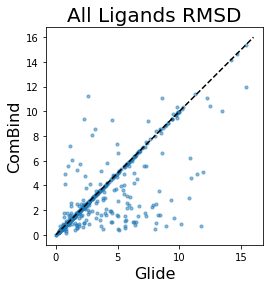

Mean RMSD Glide: 3.06907971154
Mean RMSD ComBind: 2.7062704972


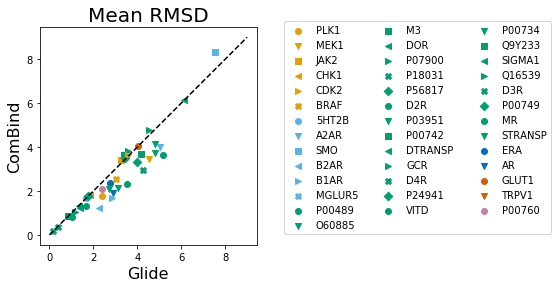

Fraction Near-Native Glide: 0.49334190255
Fraction Near-Native ComBind: 0.554781408177


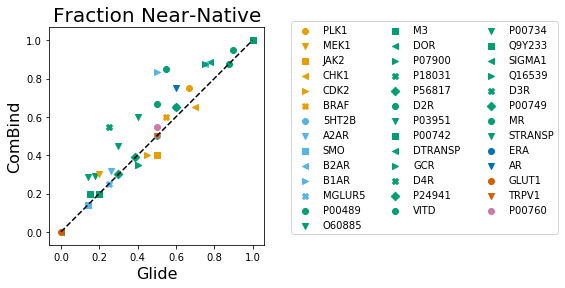

In [3]:
benchmark_pdb('20180711_c')

513 valid ligands
Ttest_relResult(statistic=4.7627854112374362, pvalue=2.4897218287364274e-06)
ComBind improves pose for 100 of 513 ligands
ComBind degrades pose for 41 of 513 ligands
All Ligands RMSD Glide: 3.19826406413, 0.460038986355
All Ligands RMSD ComBind: 2.76769111586, 0.518518518519


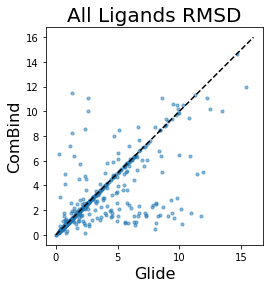

Mean RMSD Glide: 3.03403761617
Mean RMSD ComBind: 2.71809707654


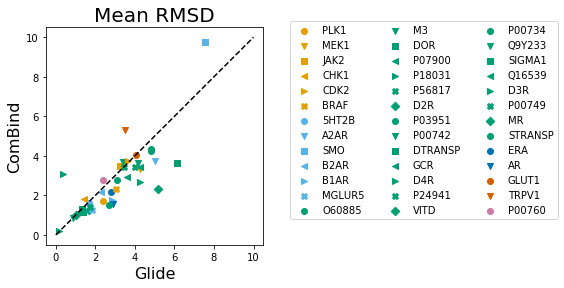

Fraction Near-Native Glide: 0.493950909199
Fraction Near-Native ComBind: 0.533722614102


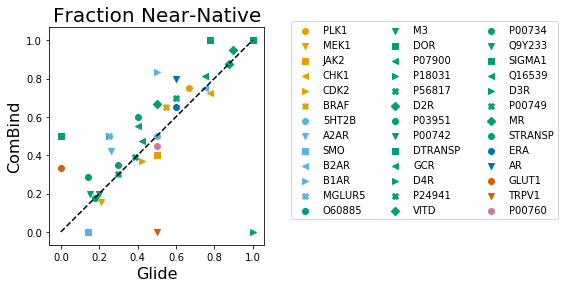

In [4]:
benchmark_chembl('20180628_scaff', 't=0.1,n=10')

514 valid ligands
Ttest_relResult(statistic=4.638996478676491, pvalue=4.4496704028653271e-06)
ComBind improves pose for 72 of 514 ligands
ComBind degrades pose for 32 of 514 ligands
All Ligands RMSD Glide: 3.21098917851, 0.459143968872
All Ligands RMSD ComBind: 2.87060678659, 0.507782101167


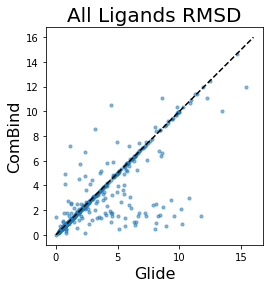

Mean RMSD Glide: 3.04108325228
Mean RMSD ComBind: 2.72890781993


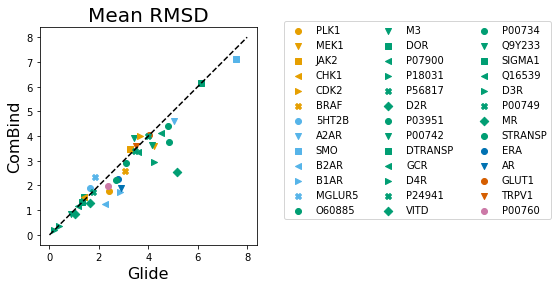

Fraction Near-Native Glide: 0.493411098132
Fraction Near-Native ComBind: 0.539220049243


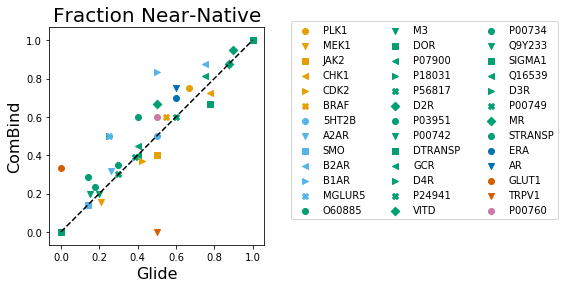

In [5]:
benchmark_chembl('20180628_Ki', 't=0.1,n=10')